<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module2/hw_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [ ]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [ ]:
print(df.shape)
df.info()

#можно заметить у столбца age примерно 20% значений пусты
#     много? как будто неприятно
#
#столбец embarked так же имеет 2 пустых строки
#     странно. посадка ниоткуда?

(891, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [ ]:
from_nowhere = df[df['embarked'].isna()]
from_nowhere
#   стоимость рассчитана. поврежденные данные или особая формула?

,pclass,sex,age,sibsp,parch,fare,embarked
61,1,female,38.0,0,0,80.0,NaN
829,1,female,62.0,0,0,80.0,NaN


In [ ]:
df.describe()



,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


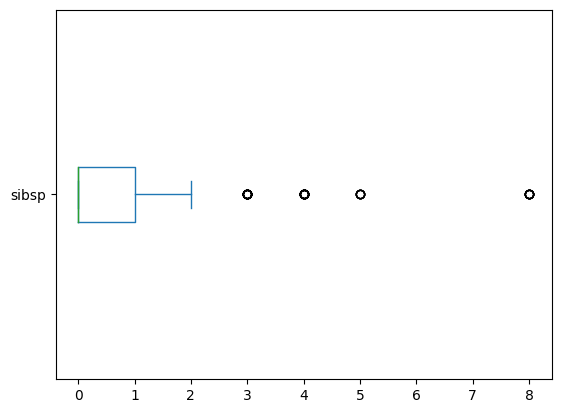

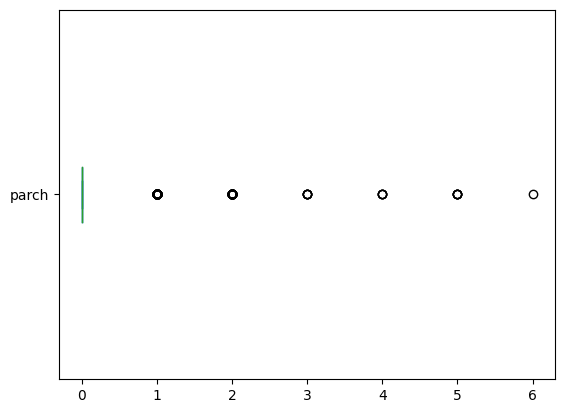

In [ ]:
# минимальный возраст 0.4? почему бы и нет
# столбцы sibsp и parch
#     теоретически ситуации реальные
#     (0-50% = 0) и (0-75% = 0-1) (0-100% = 0-8) для sibsp
#     (0-75% = 0) и (0-100% = 0-6) для parch
#     но графики с ящиками с ними получаются не очень
#     слишком много нулей. вероятно не очень полезные столбцы

df['sibsp'].plot(kind='box', vert=False)
plt.show()
df['parch'].plot(kind='box', vert=False)
plt.show()

#    особенно плачевно для parch...

In [ ]:
#столбец fare
#   минимум 0?
who = df[df['fare'] == df['fare'].min()]
who.shape

(15, 7)

<Axes: >

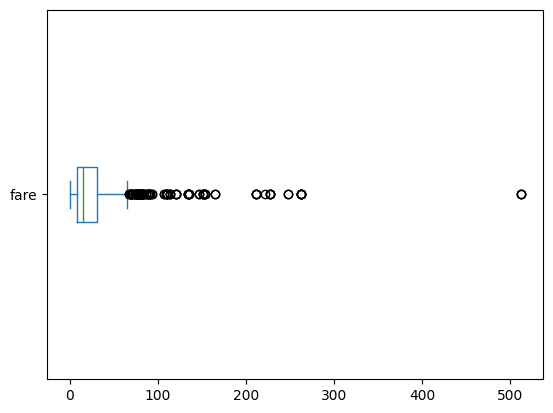

In [ ]:
#   довольно много. еще поврежденные данные или все же просто зашли и вышли?
#   стоит ли оставлять?
#
#   максимум 512. 75% данных <= 31
#   полагаю так же из-за него может косится стандартное отклонение (49.7)
#   для общей статистики вероятно может быть проблемой
#   вероятно выброс

df['fare'].plot(kind='box', vert=False)


<Axes: >

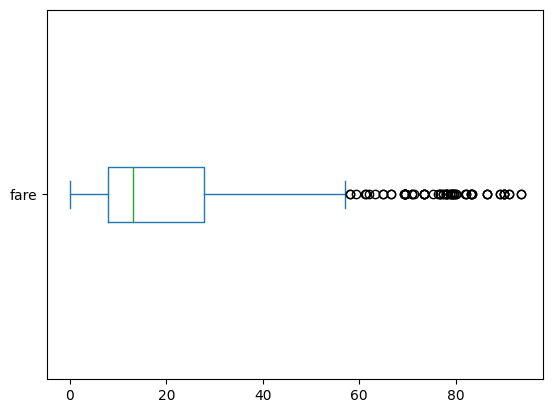

In [ ]:
df_without_max = df.drop(df[df['fare'] > 100].index)
df_without_max['fare'].plot(kind='box', vert=False)
#как будто так уже получше

In [ ]:
df.describe(include='object')

,sex,embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [ ]:
df['embarked'].value_counts()
#вероятно около порта S очень популярное место

S    644
C    168
Q     77
Name: embarked, dtype: int64

<Axes: xlabel='embarked'>

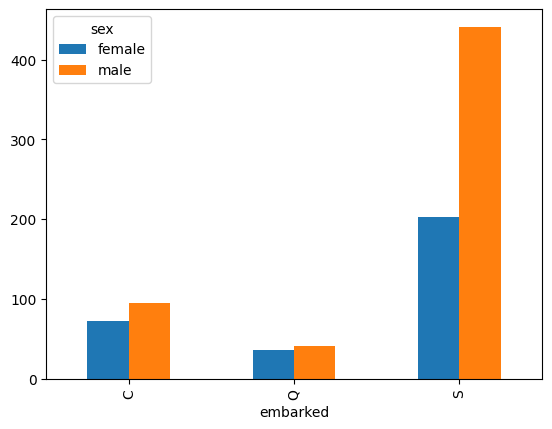

In [ ]:
passengers_by_port_sex = df.groupby(['embarked', 'sex']).size().unstack()
passengers_by_port_sex.plot(kind='bar')
#в каждом из портов мужчин садится больше нежели женщин.
# а в порту S больше более чем в два раза

In [ ]:
df.corr(method='pearson')
#на первый взгляд никакой явной корреляции

<ipython-input-52-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,pclass,age,sibsp,parch,fare
pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,-0.549500,0.096067,0.159651,0.216225,1.000000


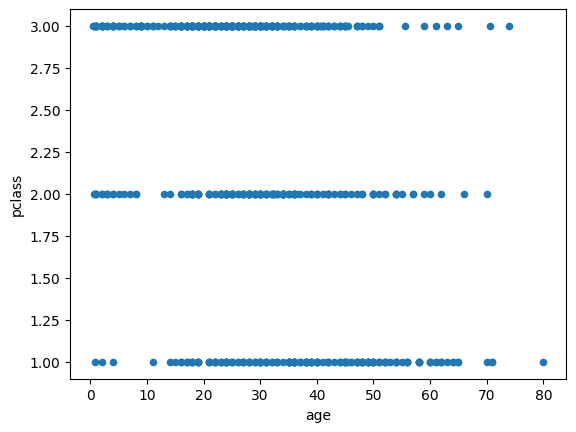

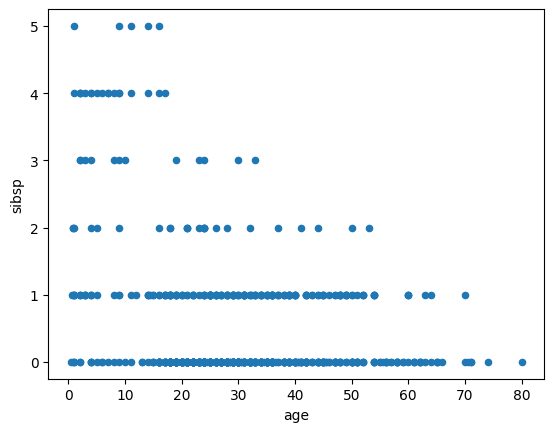

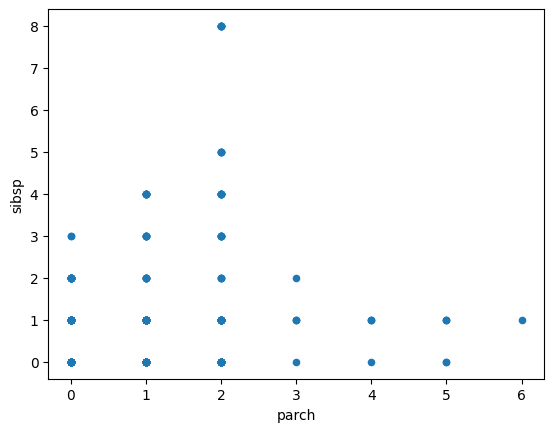

<Axes: xlabel='fare', ylabel='pclass'>

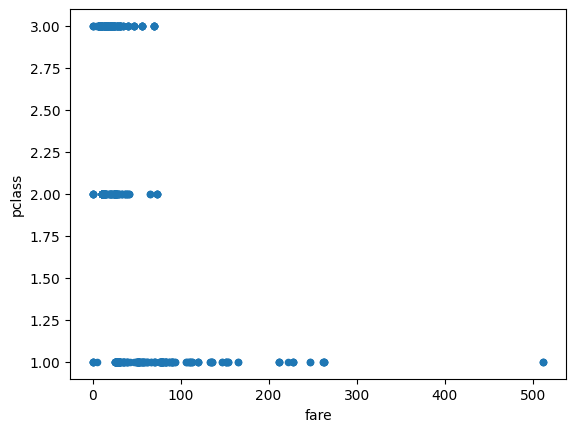

In [ ]:
df.plot(kind='scatter', x='age', y='pclass')
plt.show()
df.plot(kind='scatter', x='age', y='sibsp')
plt.show()
df.plot(kind='scatter', x='parch', y='sibsp')
plt.show()
df.plot(kind='scatter', x='fare', y='pclass')

# и на второй тоже